# 1. Import

In [1]:
import pandas as pd
import numpy as np 
from PIL import Image 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

# 2. Load Image

In [2]:
def generate_image_rgb_df(img):
    pixels = []
    img_data = img.load()
    width, height = img.size
    
    for y in range(height):
        for x in range(width):
            pixel = img_data[x, y]
            pixels.append(pixel) 
            
    try:
        img_data = pd.DataFrame(pixels, columns=["R", "G", "B"]) 
    except ValueError:
        img_data = pd.DataFrame(pixels, columns=["R", "G", "B", "A"])
        img_data = img_data[["R", "G", "B"]]
    
    return img_data

In [3]:
def load_img(filepath):
    """
    Load an image and its pixel data from the specified file path.

    Args:
    - filepath (str): The file path to the image file.

    Returns:
    - img (PIL.Image.Image): The loaded image object.
    - img_data (PixelAccess): The pixel data of the image.
    """
    img = Image.open(filepath)
    img_data = generate_image_rgb_df(img)
    return img, img_data

In [4]:
img, img_data = load_img(r"..\data\images\sea.jpg")


print(img.format, img.size, img.mode)

JPEG (800, 800) RGB


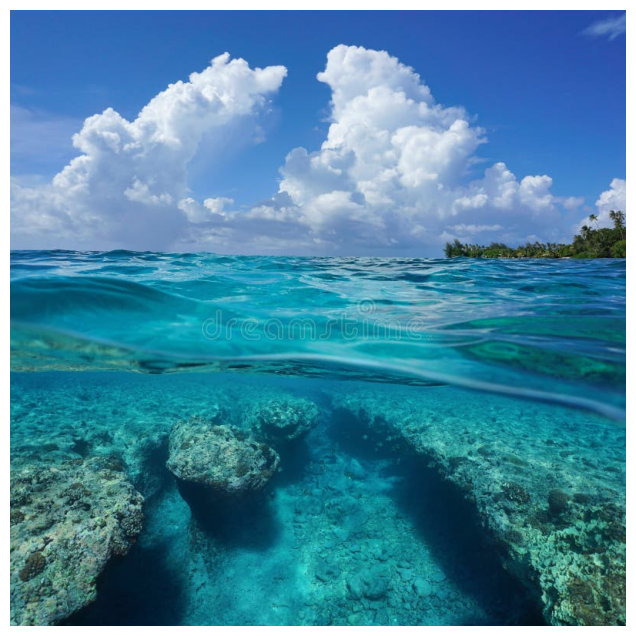

In [5]:
def imgshow(img, height=3, width=2):
    """
    Display an image using Matplotlib within a Jupyter Notebook.

    Parameters:
    img (PIL.Image.Image): The image to display.
    height (int, optional): Height of the displayed image. Default is 3.
    width (int, optional): Width of the displayed image. Default is 2.
    """
    plt.figure(figsize=(height, width))
    plt.imshow(img)
    plt.axis("off")
    plt.show()
    
    
imgshow(img, 12, 8)

In [6]:
img_data.head()

,R,G,B
0,52,103,182
1,52,103,182
2,52,103,182
3,52,103,182
4,52,103,182


# 3. Preprocessing 

In [7]:
def normalise_data(df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df)
    return scaled_data, scaler
scaled_img_data, scaler = normalise_data(img_data)

In [8]:
scaled_img_data

array([[0.20883534, 0.39920949, 0.71372549],
       [0.20883534, 0.39920949, 0.71372549],
       [0.20883534, 0.39920949, 0.71372549],
       ...,
       [0.02409639, 0.15019763, 0.16078431],
       [0.05220884, 0.18577075, 0.19215686],
       [0.06425703, 0.20948617, 0.21176471]])

# 4. Training and Inference

In [9]:
def get_cluster_centres(scaled_img_data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, n_init = 'auto')
    cluster_labels = kmeans.fit_predict(scaled_img_data)
    cluster_centers = kmeans.cluster_centers_
    return cluster_centers, cluster_labels


cluster_centers, cluster_labels = get_cluster_centres(scaled_img_data, 5)
cluster_centers 

array([[0.46675263, 0.63097976, 0.76463091],
       [0.07273354, 0.48233003, 0.55374904],
       [0.7530624 , 0.80564009, 0.88530153],
       [0.05177372, 0.23225953, 0.29256975],
       [0.20781755, 0.46488721, 0.70371674]])

In [10]:
def sort_by_colour_dominance(cluster_centers, cluster_labels, scaler):
    unique_labels, label_counts = np.unique(cluster_labels, return_counts=True)
    sorted_indices = np.argsort(label_counts)[::-1]
    sorted_cluster_centers = cluster_centers[sorted_indices]
    rev_sorted_cluster_centers = scaler.inverse_transform(sorted_cluster_centers)
    return rev_sorted_cluster_centers

sorted_cluster_centers = sort_by_colour_dominance(cluster_centers, cluster_labels, scaler)

In [11]:
sorted_cluster_centers

array([[ 18.11065074, 124.02949682, 141.20600529],
       [ 51.74656912, 119.61646306, 179.44776888],
       [116.22140563, 161.63787843, 194.98088208],
       [ 12.89165571,  60.76166185,  74.6052853 ],
       [187.51253648, 205.82694274, 225.75189116]])

# 5. Plot Dominant Colours

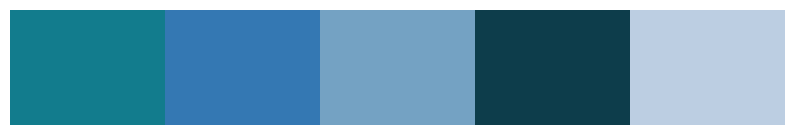

FileNotFoundError: [Errno 2] No such file or directory: '..\\artifacts\\plots\\jupyter_output.png'

In [12]:
def plot_centre_patches(cluster_centers):
    fig, ax = plt.subplots(figsize=(10, 1.5))
    num_centers = len(cluster_centers)
    rect_width = 1.0 / num_centers

    for i, cluster_center in enumerate(cluster_centers):
        facecolor = (cluster_center[0] / 255.0, cluster_center[1] / 255.0, cluster_center[2] / 255.0)
        rect = Rectangle((i * rect_width, 0), rect_width, 1, facecolor=facecolor)
        ax.add_patch(rect)

    ax.axis('off')
    plt.show()
    fig.savefig(r"..\artifacts\plots\jupyter_output")
    
plot_centre_patches(sorted_cluster_centers)